# PCB DEFECTS DETECTION
Dataset Used: PCB_augmented

Algorithm applied: One-class SVM

Modules

In [9]:
import os
import cv2
import numpy as np
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


Data preprocessing

In [10]:
# Function to load and preprocess images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))  # Read image in color
        if img is not None:
            # Resize image to a fixed size (e.g., 100x100)
            img = cv2.resize(img, (100, 100))
            images.append((filename, img))  # Store filename along with image
    return images

In [12]:
# Replace 'good_images_folder_path' with the path to the directory containing your "good" images
good_images_folder_path = r'R:\SIEMENS_Intern\PCB_Augmented'

# Load and preprocess "good" images from the specified folder
good_images = load_images_from_folder(good_images_folder_path)

# Convert "good" images to numpy array
X_good = np.array([image[1] for image in good_images])

# Flatten the array of "good" images
X_good = X_good.reshape(X_good.shape[0], -1)

Train-test split of data

In [13]:
# Split data into train and remaining data (validation + test)
X_train, X_rem, _, _ = train_test_split(X_good, np.zeros(len(X_good)), test_size=0.5, random_state=42)

# Split remaining data into validation and test
X_val, X_test = train_test_split(X_rem, test_size=0.5, random_state=42)

In [14]:
# Train the One-Class SVM model using "good" images
clf = OneClassSVM()
clf.fit(X_train)

OneClassSVM()

In [15]:
# Replace 'test_images_folder_path' with the path to the directory containing test images
test_images_folder_path = r'R:\SIEMENS_Intern\PCB_Augmented'

# Load and preprocess test images from the specified folder
test_images = load_images_from_folder(test_images_folder_path)


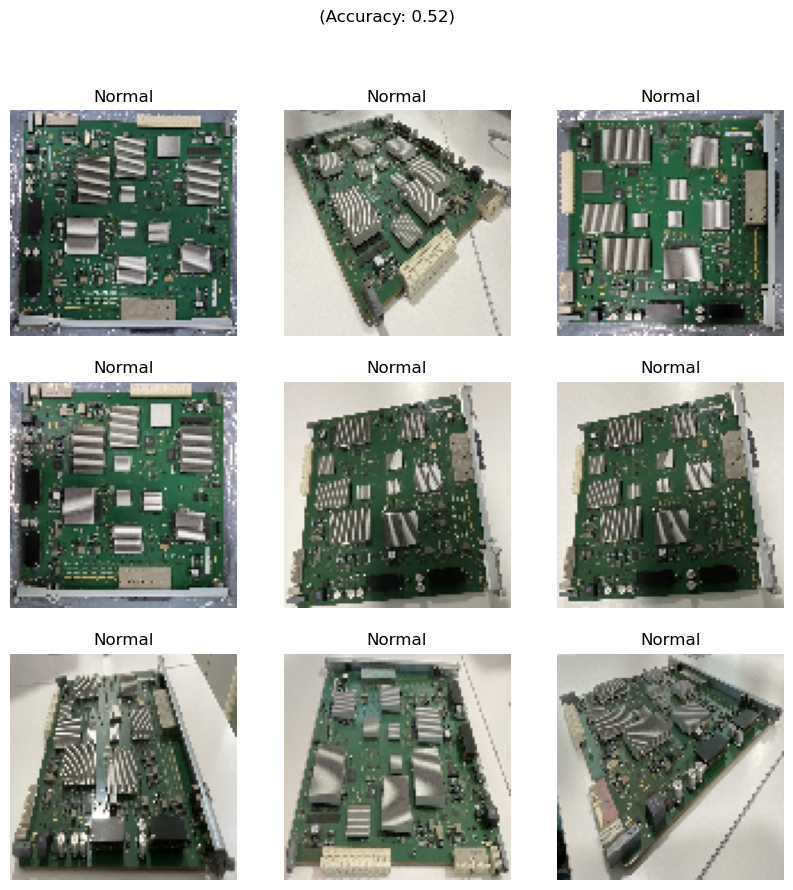

In [16]:
# Check if test images are loaded successfully
if len(test_images) == 0:
    print("No test images found in the specified folder. Please check the folder path.")
else:
    # Convert test images to numpy array and flatten them
    X_test = np.array([image[1] for image in test_images]).reshape(len(test_images), -1)

    # Predict anomalies using the trained model
    y_pred_test = clf.predict(X_test)

    # Convert predictions to binary labels (0 for normal, 1 for anomaly)
    y_pred_test[y_pred_test == 1] = 0  # Normal
    y_pred_test[y_pred_test == -1] = 1  # Anomaly

    # Calculate accuracy based on the proportion of anomalies predicted
    accuracy = np.mean(y_pred_test == 1)

    # Output predictions along with images in a 3x3 grid
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))
    fig.suptitle(f' (Accuracy: {accuracy:.2f})')
    for i in range(3):
        for j in range(3):
            index = i * 3 + j
            if index < len(test_images):
                filename, image = test_images[index]
                pred = y_pred_test[index]
                axs[i, j].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
                if pred == 1:
                    axs[i, j].set_title('Defective')
                else:
                    axs[i, j].set_title('Normal')
                axs[i, j].axis('off')
            else:
                axs[i, j].axis('off')

    plt.show()
